In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
df[df.duplicated()].shape

(0, 2)

In [7]:
df[df.duplicated()]

,YearsExperience,Salary


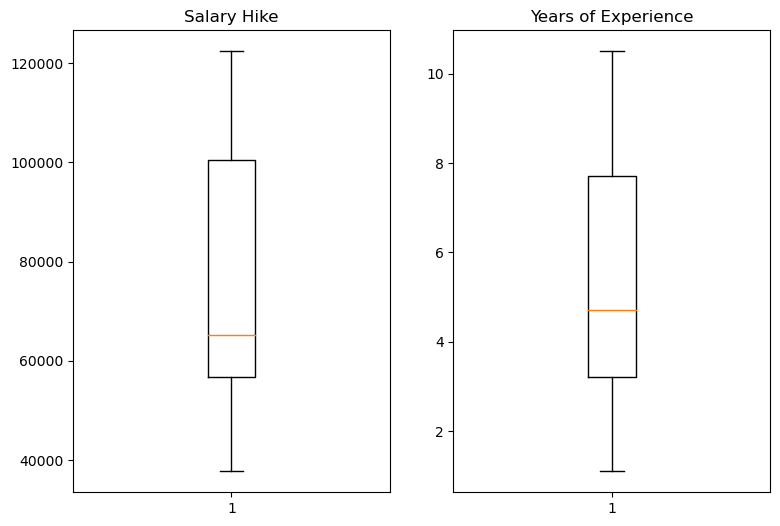

In [8]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(df['Salary'])
plt.title('Salary Hike')
plt.subplot(122)
plt.boxplot(df['YearsExperience'])
plt.title('Years of Experience')
plt.show()

In [9]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

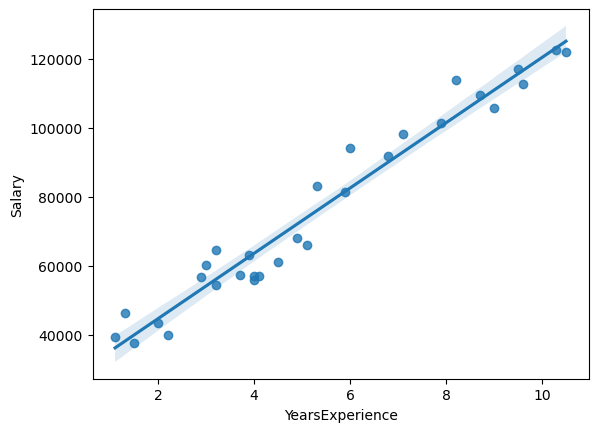

In [10]:
sns.regplot(x=df['YearsExperience'],y=df['Salary'])  

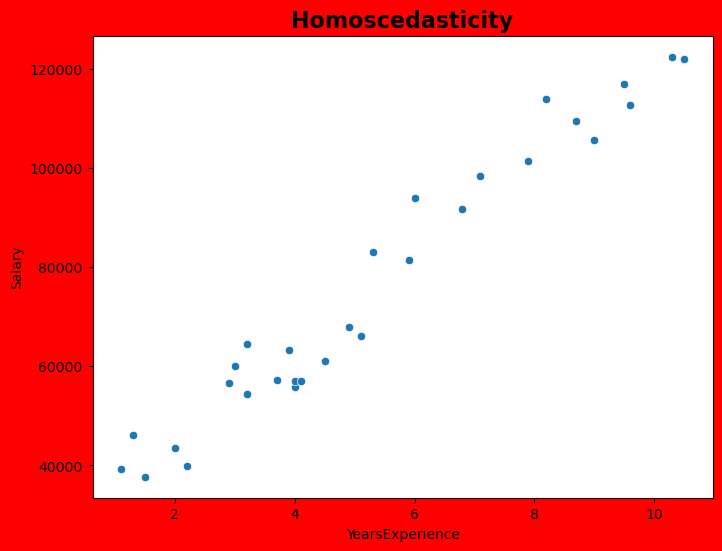

In [11]:
plt.figure(figsize = (8,6), facecolor = 'r')
sns.scatterplot(x = df['YearsExperience'], y = df['Salary'])
plt.title('Homoscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

In [12]:
df.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

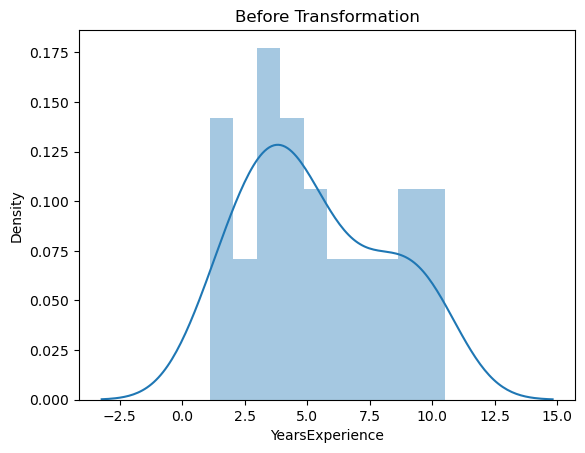

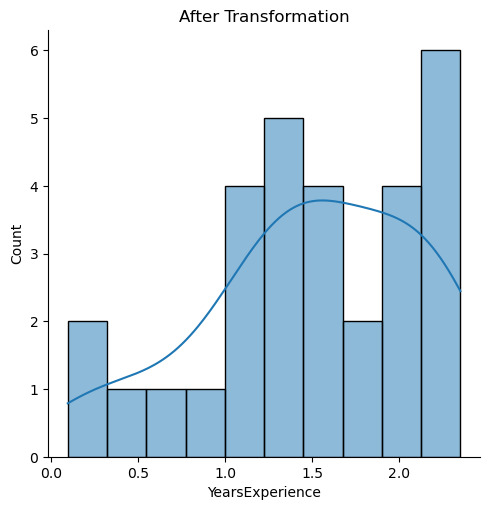

In [13]:
sns.distplot(df['YearsExperience'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['YearsExperience']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

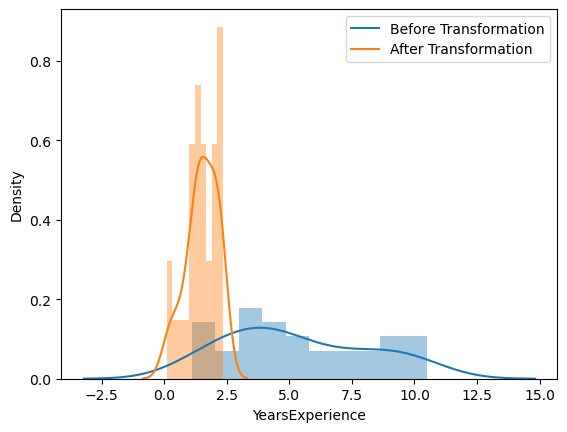

In [14]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['YearsExperience'], bins = 10, kde = True)
sns.distplot(np.log(df['YearsExperience']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

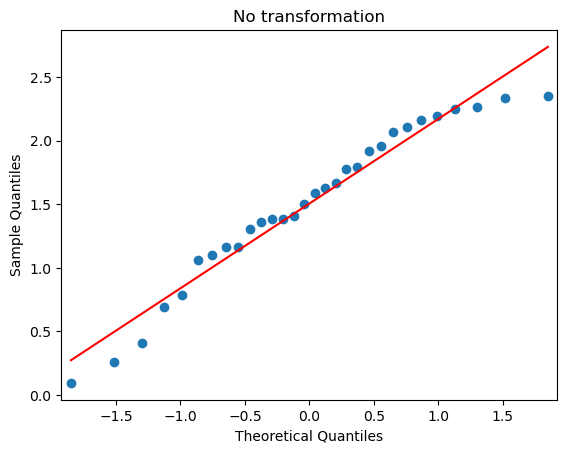

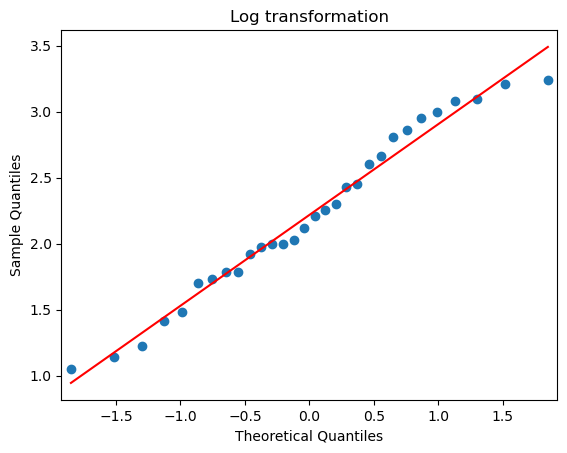

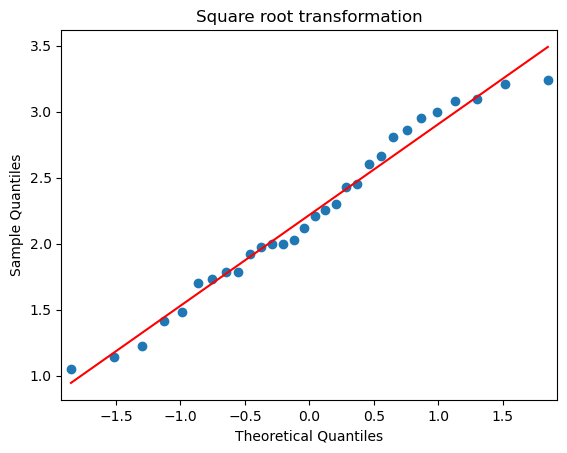

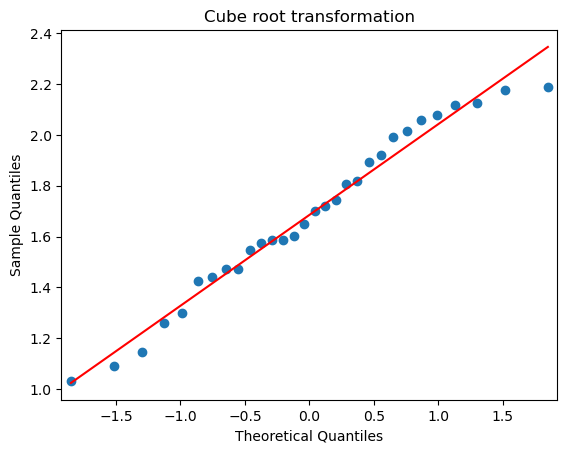

In [15]:
smf.qqplot(np.log(df['YearsExperience']), line = 'r')
plt.title('No transformation')
smf.qqplot(np.sqrt(df['YearsExperience']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(df['YearsExperience']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(df['YearsExperience']), line = 'r')
plt.title('Cube root transformation')
plt.show()

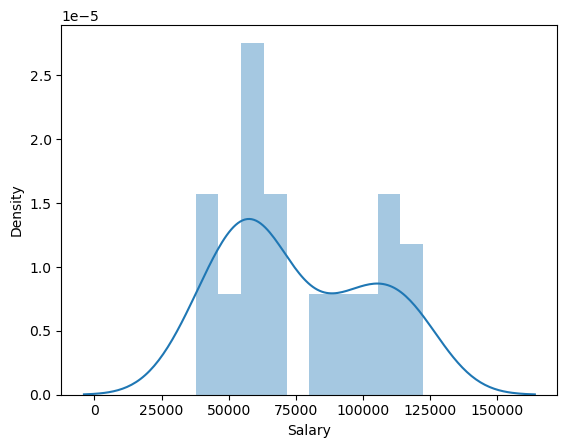

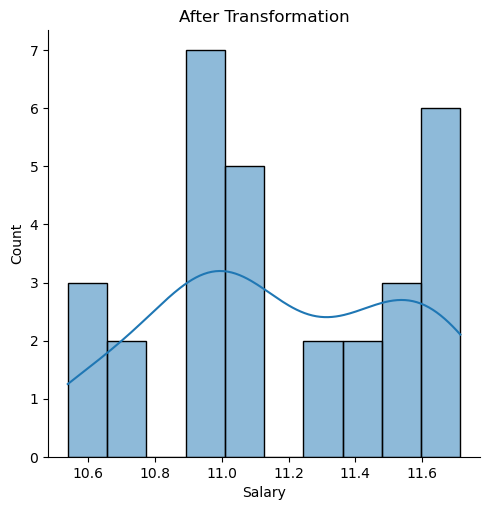

In [16]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['Salary'], bins = 10, kde = True)
sns.displot(np.log(df['Salary']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

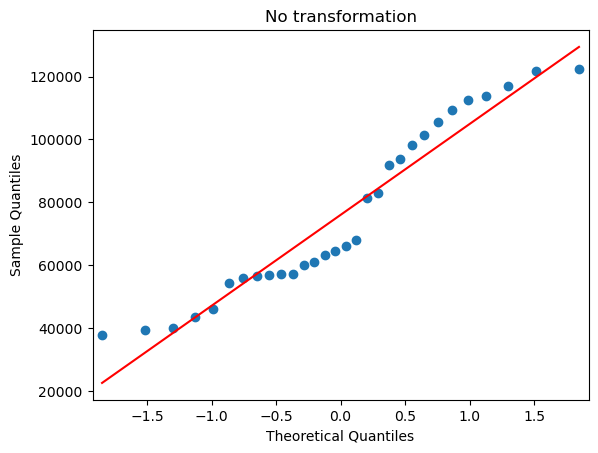

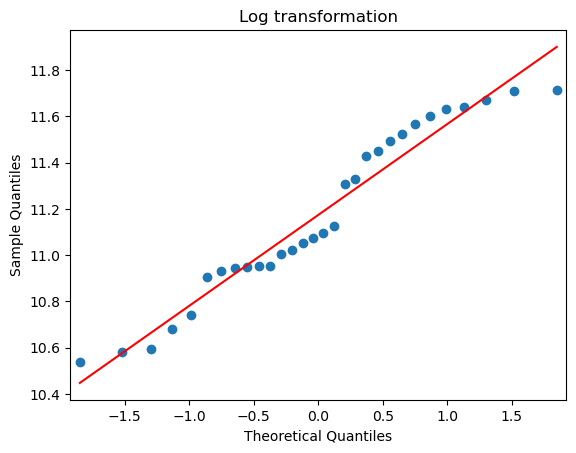

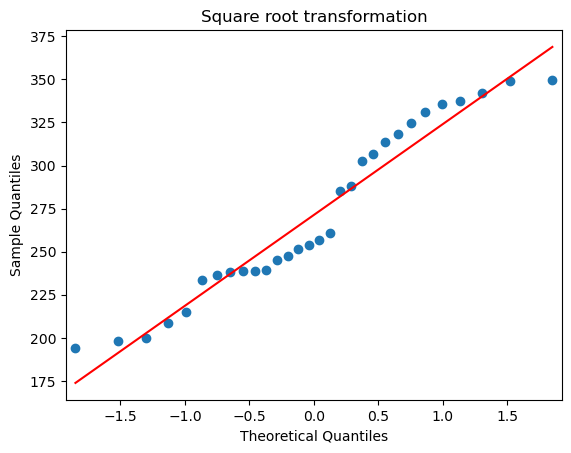

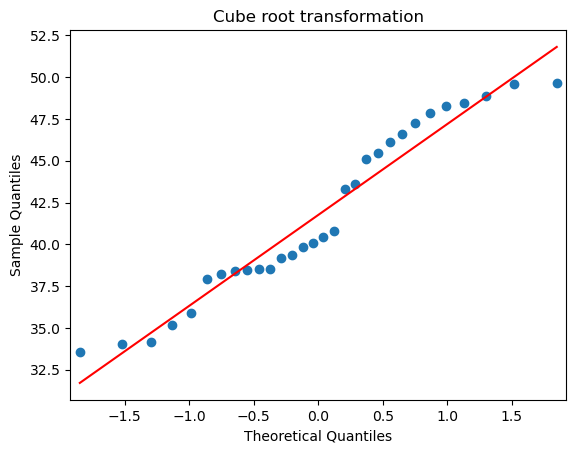

In [17]:
smf.qqplot(df['Salary'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(df['Salary']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(df['Salary']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(df['Salary']), line = 'r')
plt.title('Cube root transformation')
plt.show()

In [18]:
import statsmodels.formula.api as sm
model = sm.ols('Salary~YearsExperience', data = df).fit()

# SQRT Transformation

In [19]:
model1 = sm.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)', data = df).fit()


In [20]:
model2 = sm.ols('np.cbrt(Salary)~np.cbrt(YearsExperience)', data = df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           6.37e-18
Time:                        17:59:59   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(YearsExperience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Log transformation on Data

In [21]:
model3 = sm.ols('np.log(Salary)~np.log(YearsExperience)', data = df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           7.40e-16
Time:                        17:59:59   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [23]:
print(model.tvalues,'\n',model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [24]:
model.rsquared,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
model1_pred_y =np.square(model1.predict(df['YearsExperience']))
model2_pred_y =pow(model2.predict(df['YearsExperience']),3)
model3_pred_y =np.exp(model3.predict(df['YearsExperience']))

In [27]:
model1_rmse =np.sqrt(mean_squared_error(df['Salary'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(df['Salary'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(df['Salary'], model3_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)

model= 5788.315051119395 
model1= 5960.647096174311 
model2= 6232.8154558358565 
model3= 7219.716974372802


In [28]:
rmse = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model3_rmse, 'model3' : model3_rmse}
min(rmse, key=rmse.get)

'model'

In [29]:
# first model results without any transformation
predicted2 = pd.DataFrame()
predicted2['YearsExperience'] = df.YearsExperience
predicted2['Salary'] = df.Salary
predicted2['Predicted_Salary_Hike'] = pd.DataFrame(model.predict(predicted.YearsExperience))
predicted2

NameError: name 'predicted' is not defined

In [30]:
df = pd.read_csv('delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [31]:
df1 = df.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'}, axis = 1)
df1

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [32]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [34]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [35]:
df[df.duplicated()].shape

(0, 2)

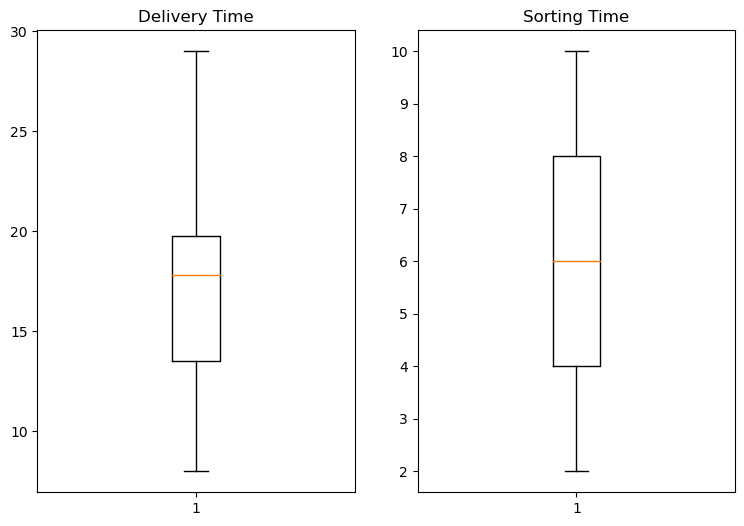

In [36]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(df['Delivery Time'])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(df['Sorting Time'])
plt.title('Sorting Time')
plt.show()

<Axes: >

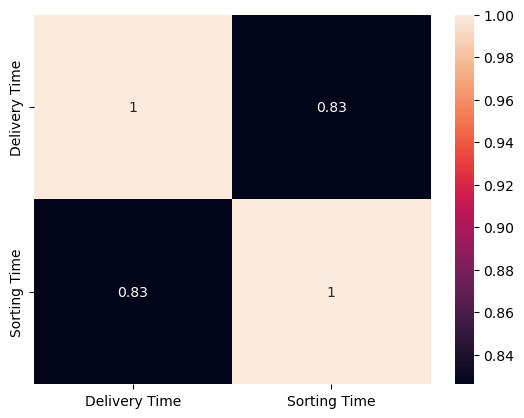

In [37]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

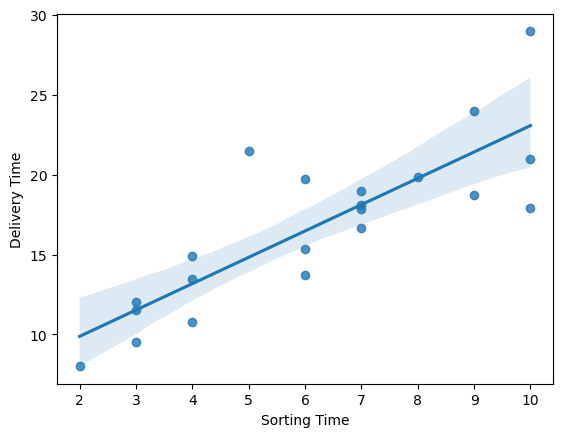

In [38]:
sns.regplot(x=df['Sorting Time'],y=df['Delivery Time'])  

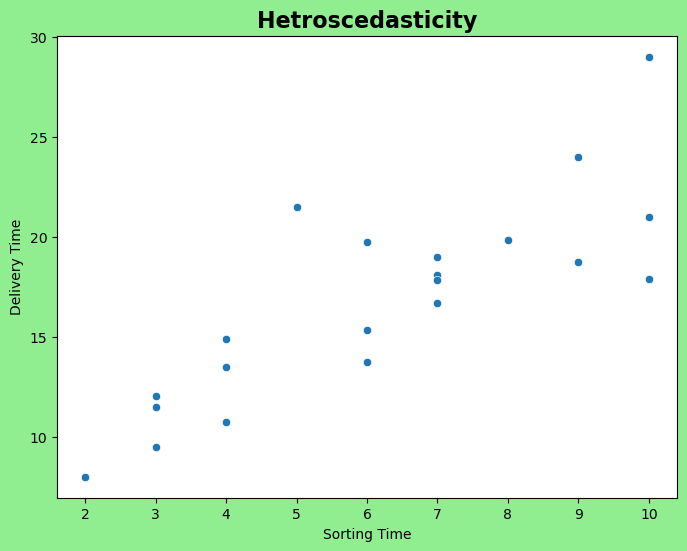

In [39]:
plt.figure(figsize = (8,6), facecolor = 'lightgreen')
sns.scatterplot(x = df['Sorting Time'], y = df['Delivery Time'])
plt.title('Hetroscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

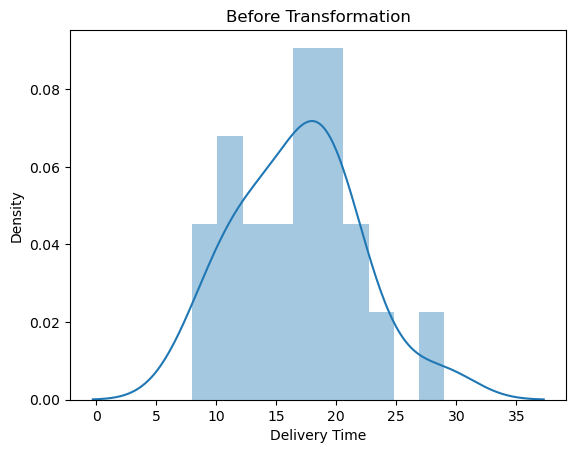

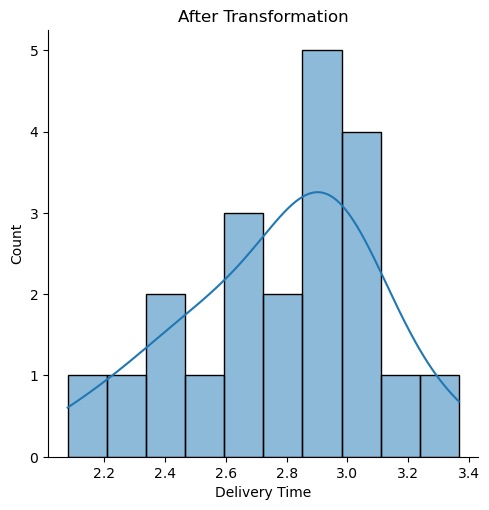

In [40]:
sns.distplot(df['Delivery Time'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['Delivery Time']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

# Tranformation

1. LOG

2.SQRT

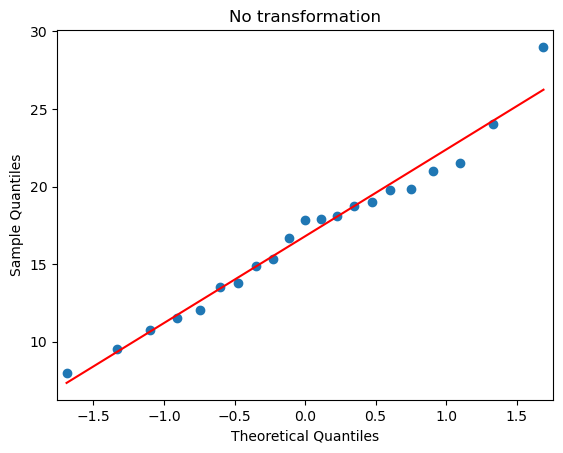

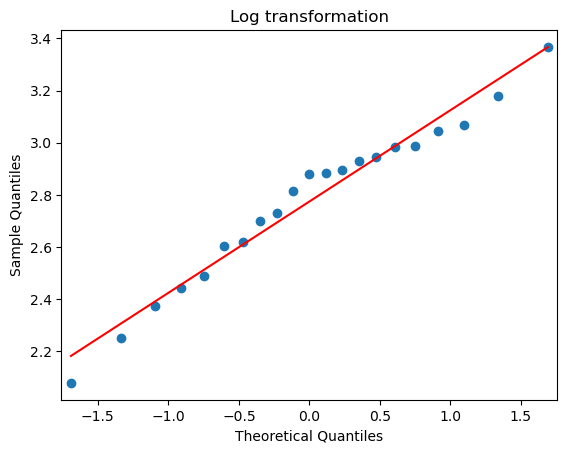

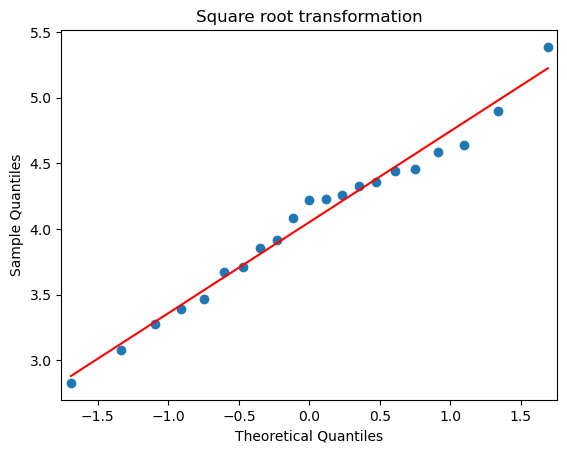

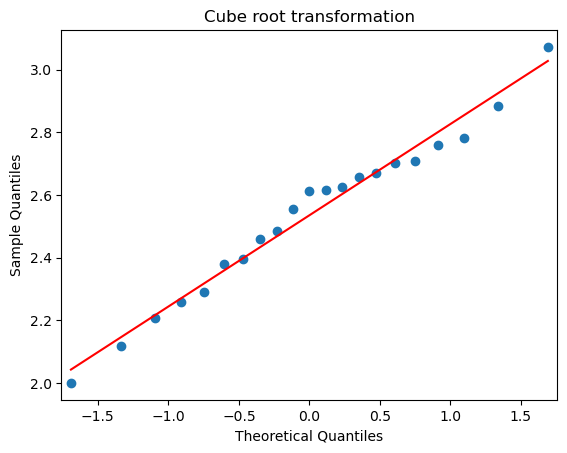

In [41]:
smf.qqplot(df['Delivery Time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(df['Delivery Time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(df['Delivery Time']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(df['Delivery Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

# Model Bulding

In [42]:
model = sm.ols('Delivery_Time~Sorting_Time', data = df1).fit()

In [43]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 19 Feb 2024   Prob (F-statistic):           3.98e-06
Time:                        18:03:46   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# SQRT Transformation

In [44]:
model1 = sm.ols('np.sqrt(Delivery_Time)~np.sqrt(Sorting_Time)', data = df1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(Delivery_Time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Mon, 19 Feb 2024   Prob (F-statistic):           8.48e-07
Time:                            18:04:17   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(Sorting_Time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# LOg Transformation

In [45]:
model3 = sm.ols('np.log(Delivery_Time)~np.log(Sorting_Time)', data = df1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Mon, 19 Feb 2024   Prob (F-statistic):           1.60e-07
Time:                           18:04:48   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [47]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)